<a href="https://colab.research.google.com/github/adnanagbaria/MLcourse/blob/main/class3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

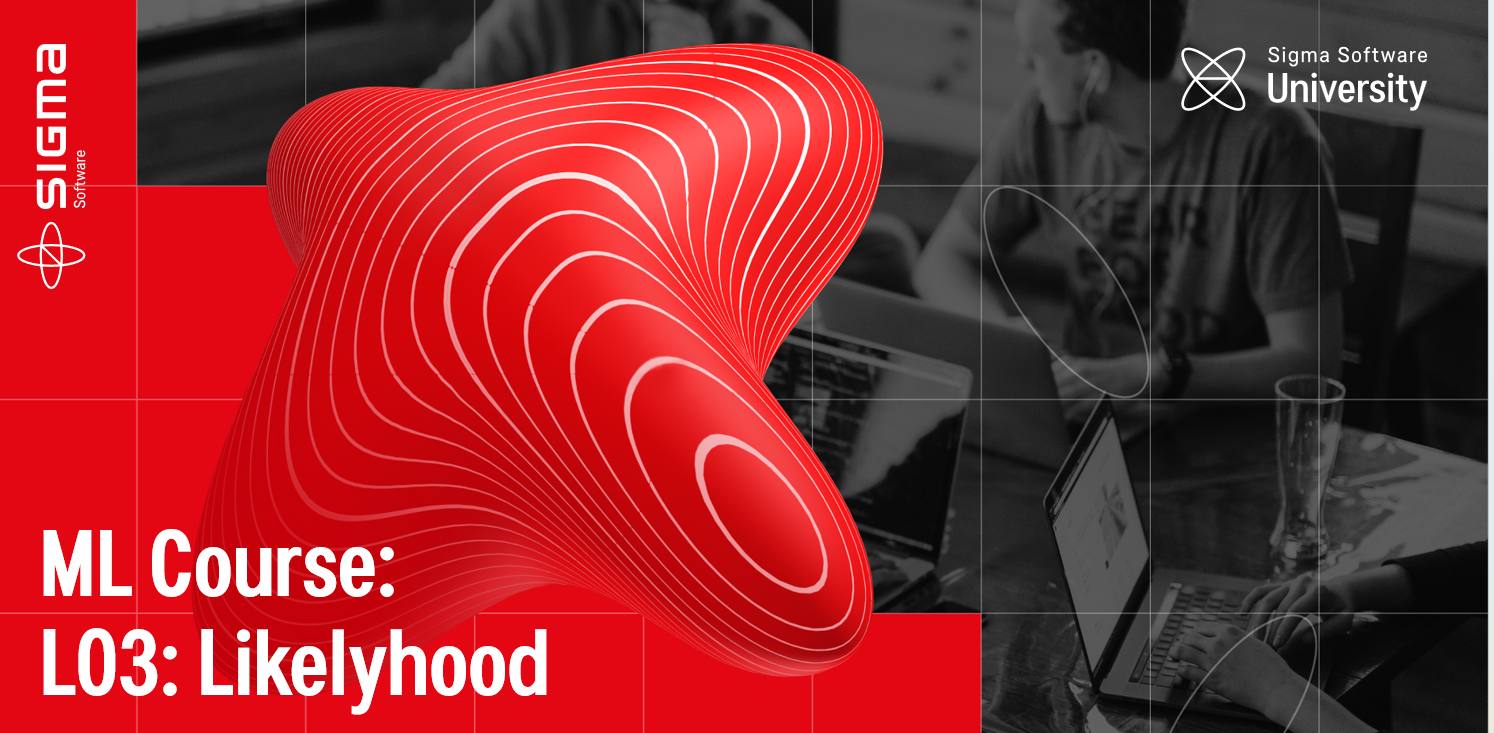

#Agenda
* Logarithms
* Probability and Likelyhood
* Maximum Likelyhood
* Maximum Likelihood for the Exponential Distribution
* Odds and Log (Odds)
* Odds Ratios and Log (Odds)

# Logarithms
A logarithm answers the question: "To what power must we raise a base to get a number?"

For example: $\log_2(8)=3$ because $2^3 = 8$

# How Logarithms Are Used in Machine Learning

##Simplifying Likelihood Calculations
**In Maximum Likelihood Estimation (MLE):**
Find parameters 𝜃 θ that maximize the likelihood of observing your data.
If you have data points $x_1, \dots, x_n$, and you assume they are generated from a probability distribution $P(x|\theta)$, then the likelihood function is:

$L(\theta) = P(x_1, x_2,\dots, x_n|\theta) = \Pi_{i=1}^n(Px_i|\theta)$

The product of probabilities can get very small, so we use the log-likelihood:

$\log(\theta) = \Sigma_{i=1}^{n}P(x_i|\theta)$

This use of logs helps ensure the model produces well-calibrated probabilities.

##Defining Loss Functions
* Log Loss / Cross-Entropy is a key loss function in classification tasks.

    Log Loss = $-\Sigma y\log(\hat{y}) + (1-y)\log(1-\hat{y})$

It penalizes wrong confident predictions more heavily.

##Interpreting Odds and Log-Odds
More details below.

##Entropy and Information Theory
Used in Decision Trees and Information Gain -- Will talk on this topic in the comming classes.

##Feature Scaling and Transformation:
**Reduce Skewness:**
* Many real-world features (like income, population, file sizes) are right-skewed
* Taking the log compresses large values and stretches smaller ones, making the distribution more symmetric and often closer to normal

**Linearize Relationships:**
Log transformations can straighten curved relationships, making data more suitable for linear models.

**Handle Multiplicative Effects:** If a feature behaves multiplicatively (e.g., compound interest, exponential growth), log transforms convert it into additive form, which linear models handle better.

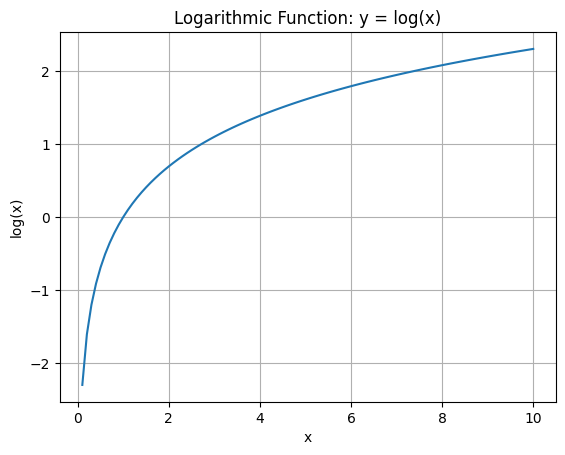

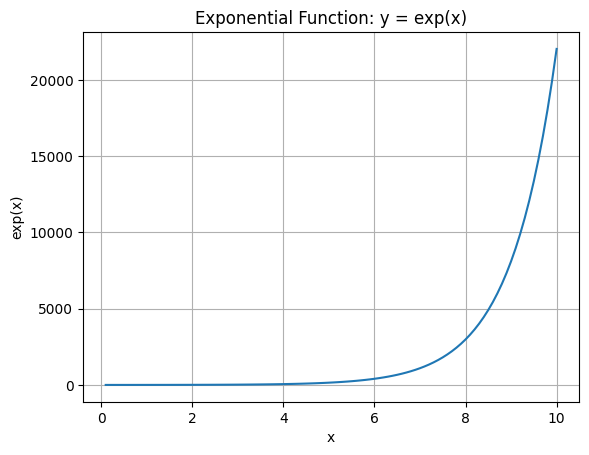

In [5]:
# prompt: show me a graph of log function vs exponential function, in different figures

import numpy as np
import matplotlib.pyplot as plt

# Define the range for x
x = np.linspace(0.1, 10, 100) # Avoid log(0)

# Calculate y values for log and exponential functions
y_log = np.log(x)
y_exp = np.exp(x)

# Create the first figure for the log function
plt.figure()
plt.plot(x, y_log)
plt.title('Logarithmic Function: y = log(x)')
plt.xlabel('x')
plt.ylabel('log(x)')
plt.grid(True)

# Create the second figure for the exponential function
plt.figure()
plt.plot(x, y_exp)
plt.title('Exponential Function: y = exp(x)')
plt.xlabel('x')
plt.ylabel('exp(x)')
plt.grid(True)

# Show the plots
plt.show()

# Probability and Likelihood

| Concept        | **Probability**                                                     | **Likelihood**                                                       |
| -------------- | ------------------------------------------------------------------- | -------------------------------------------------------------------- |
| **Definition** | Measures the chance of observing an outcome given known parameters. | Measures how plausible a set of parameters is given observed data.   |
| **Notation**   | $P(x \mid \theta)$                                                  | $L(\theta \mid x)$                                                   |
| **Variable**   | Outcome $x$ is variable, $\theta$ is fixed.                         | Parameters $\theta$ are variable, $x$ is fixed.                      |
| **Use Case**   | Predicting new data from a model.                                   | Estimating the model itself from data.                               |
| **Example**    | "Given a fair coin, what’s the chance of 3 heads in 4 flips?"       | "Given 3 heads in 4 flips, what’s the most likely bias of the coin?" |

**Example:**
Imagine you have a dice:
* Probability: You know the dice is fair, what’s the chance of rolling a 6?
* Likelihood: You see that the number 6 came up often—how likely is the dice to be fair?


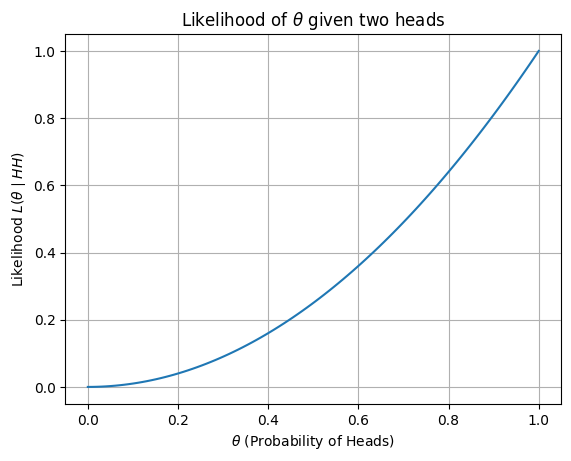

In [6]:
# prompt: Do you have any example for Probability vs Likelihood

import matplotlib.pyplot as plt
import numpy as np
theta = np.linspace(0, 1, 100)
likelihood = theta**2

plt.figure()
plt.plot(theta, likelihood)
plt.title('Likelihood of $\\theta$ given two heads')
plt.xlabel('$\\theta$ (Probability of Heads)')
plt.ylabel('Likelihood $L(\\theta \\mid HH)$')
plt.grid(True)
plt.show()


# Maximum Likelihood
Maximum Likelihood Estimation (MLE) finds the parameter values that maximize the likelihood of observing the given data.

If you have data points $x_1, \dots, x_n$, and you assume they are generated from a probability distribution $P(x|\theta)$, then the likelihood function is:

$\L(\theta) = P(x_1, x_2,\dots, x_n|\theta) = \Pi_{i=1}^n(Px_i|\theta)$

The product of probabilities can get very small, so we use the log-likelihood:

$\log(\theta) = \Sigma_{i=1}^{n}P(x_i|\theta)$

Then, we solve: $\hat{\theta} = arg \max{\log L(\theta)}$


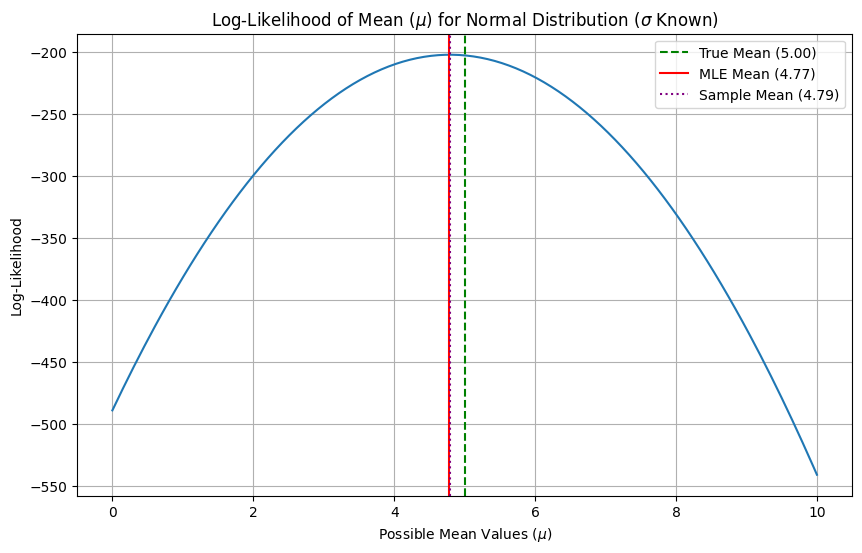

Sample Mean: 4.7923
MLE Estimate for Mean: 4.7739


In [8]:
# prompt: Give me a graph example of Maximum Likelihood Estimation

import matplotlib.pyplot as plt
import numpy as np
# Maximum Likelihood Estimation Example

# Let's simulate some data from a normal distribution
# Assume the true mean is 5 and the true standard deviation is 2
np.random.seed(42) # for reproducibility
true_mean = 5
true_std = 2
data = np.random.normal(true_mean, true_std, 100) # 100 data points

# We want to estimate the mean of this data using MLE
# The likelihood of a single data point x_i given a mean mu and std sigma is:
# P(x_i | mu, sigma) = (1 / (sigma * sqrt(2*pi))) * exp(-(x_i - mu)^2 / (2 * sigma^2))

# For simplicity, let's assume we know the true standard deviation (sigma = 2)
# We will find the MLE for the mean (mu)
sigma = 2

# The log-likelihood function for the normal distribution (given sigma is known) is:
# log L(mu | data, sigma) = Sum(log(P(x_i | mu, sigma)))
# log L(mu | data, sigma) = Sum(log(1 / (sigma * sqrt(2*pi))) - (x_i - mu)^2 / (2 * sigma^2))
# log L(mu | data, sigma) = N * log(1 / (sigma * sqrt(2*pi))) - Sum((x_i - mu)^2) / (2 * sigma^2)

# To maximize the log-likelihood with respect to mu, we only need to minimize the negative part:
# Minimize Sum((x_i - mu)^2)
# This is the definition of the least squares estimator, which for the mean of a normal distribution
# is simply the sample mean.

# Let's calculate the log-likelihood for a range of possible mean values
mu_values = np.linspace(0, 10, 200)
log_likelihood_values = []

for mu in mu_values:
    # Calculate the log probability for each data point
    log_probs = -0.5 * np.log(2 * np.pi * sigma**2) - ((data - mu)**2) / (2 * sigma**2)
    # Sum the log probabilities to get the total log likelihood
    total_log_likelihood = np.sum(log_probs)
    log_likelihood_values.append(total_log_likelihood)

# Find the mu value that maximizes the log likelihood
mle_mu_index = np.argmax(log_likelihood_values)
mle_mu = mu_values[mle_mu_index]

# Calculate the sample mean for comparison
sample_mean = np.mean(data)

# Plot the log-likelihood function
plt.figure(figsize=(10, 6))
plt.plot(mu_values, log_likelihood_values)
plt.axvline(true_mean, color='green', linestyle='--', label=f'True Mean ({true_mean:.2f})')
plt.axvline(mle_mu, color='red', linestyle='-', label=f'MLE Mean ({mle_mu:.2f})')
plt.axvline(sample_mean, color='purple', linestyle=':', label=f'Sample Mean ({sample_mean:.2f})')

plt.title('Log-Likelihood of Mean ($\mu$) for Normal Distribution ($\\sigma$ Known)')
plt.xlabel('Possible Mean Values ($\mu$)')
plt.ylabel('Log-Likelihood')
plt.legend()
plt.grid(True)
plt.show()

print(f"Sample Mean: {sample_mean:.4f}")
print(f"MLE Estimate for Mean: {mle_mu:.4f}")


# MLE for Exponential Distribution
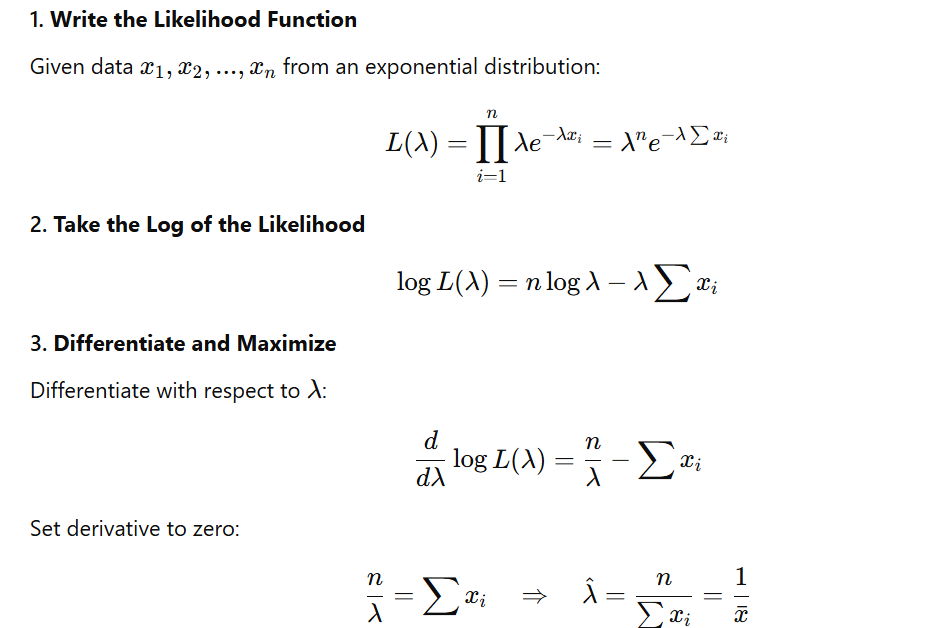

This is intuitive: the rate of an exponential process is the reciprocal of the average observed time between events.

# Odds and Log-Odds
The odds of an event are defined as the ratio of the probability it will happen to the probability it won’t:
Odds = $\frac{p}{1-p}$

**Example:**
If the probability of winning is $p=0.75$, then: Odds = $.0.75/0.25=3$ (This means you are 3 times more likely to win than lose.)

##Log-Odds (Logit Function)
Taking the logarithm of the odds gives you the log-odds:

Log-Odds = $\log(\frac{p}{1-p})$

This transformation:
* Converts probabilities (which range from 0 to 1) into the entire real number line.
* Is the inverse of the logistic (sigmoid) function


| Metric      | Formula                          | Range               |
| ----------- | -------------------------------- | ------------------- |
| Probability | $p$                              | \[0, 1]             |
| Odds        | $\frac{p}{1-p}$                  | \[0, ∞)             |
| Log-Odds    | $\log\left(\frac{p}{1-p}\right)$ | $(-\infty, \infty)$ |



Probability: 0.75
Odds: 3.0
Log-Odds: 1.0986122886681098


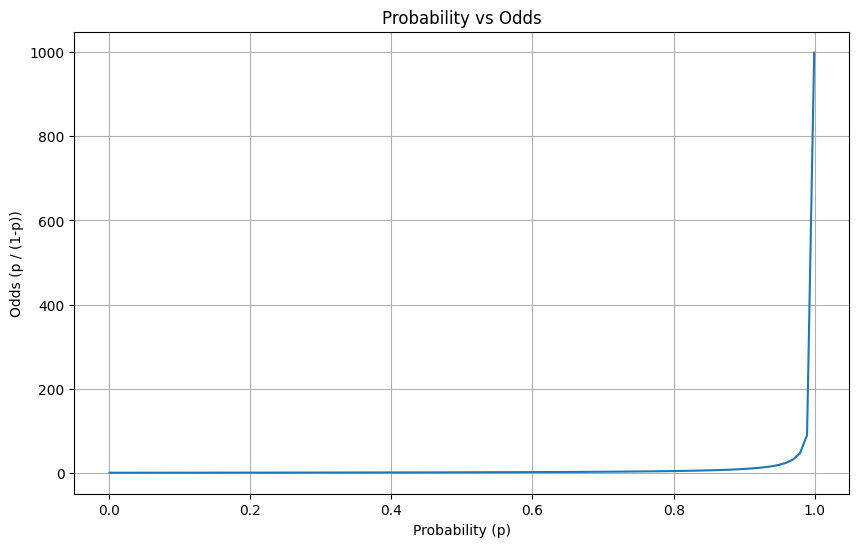

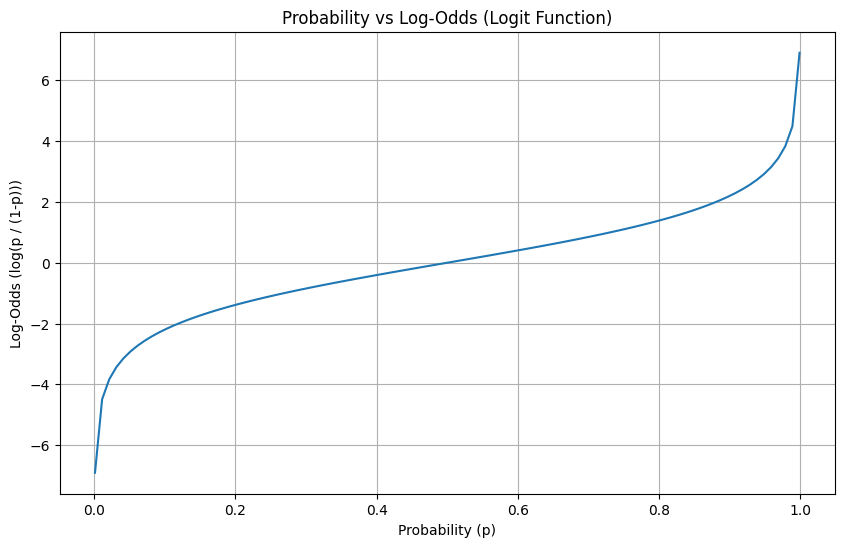

In [9]:
# prompt: show me example for Odds and Log-Odds

import matplotlib.pyplot as plt
import numpy as np
# Example: Calculate Odds and Log-Odds for a given probability
probability = 0.75

# Calculate Odds
odds = probability / (1 - probability)
print(f"Probability: {probability}")
print(f"Odds: {odds}")

# Calculate Log-Odds (using natural logarithm)
log_odds = np.log(odds)
print(f"Log-Odds: {log_odds}")

# Example: Plot Probability vs Odds and Probability vs Log-Odds
p_values = np.linspace(0.001, 0.999, 100) # Avoid 0 and 1 for log

odds_values = p_values / (1 - p_values)
log_odds_values = np.log(odds_values)

# Plot Probability vs Odds
plt.figure(figsize=(10, 6))
plt.plot(p_values, odds_values)
plt.title('Probability vs Odds')
plt.xlabel('Probability (p)')
plt.ylabel('Odds (p / (1-p))')
plt.grid(True)

# Plot Probability vs Log-Odds
plt.figure(figsize=(10, 6))
plt.plot(p_values, log_odds_values)
plt.title('Probability vs Log-Odds (Logit Function)')
plt.xlabel('Probability (p)')
plt.ylabel('Log-Odds (log(p / (1-p)))')
plt.grid(True)

plt.show()


# Odds Ratios and Log(Odds)
The odds ratio compares the odds of an event happening in two groups:

Odds Ratio = Odds in Group A / Odds in Group B

**Example:**
* Odds of disease in exposed group = 2
* Odds in unexposed group = 0.5
* Odds Ratio = 4

##Log(Odds Ratio)
Taking the logarithm of the odds ratio.
* Makes the comparison additive instead of multiplicative.
* Often used in logistic regression, where coefficients represent log-odds ratios.

**Why Use Log(Odds Ratio)**
* Easier to model linearly
* Interpretable: a positive value → increased odds, negative → decreased odds.
* Symmetric around 0 (unlike odds ratio which is bounded below by 0).

| Term            | Formula                                   | Interpretation                        |
| --------------- | ----------------------------------------- | ------------------------------------- |
| Odds            | $\frac{p}{1 - p}$                         | Likelihood of event happening         |
| Odds Ratio      | $\frac{p_1 / (1 - p_1)}{p_2 / (1 - p_2)}$ | Ratio of odds between two groups      |
| Log-Odds        | $\log\left(\frac{p}{1 - p}\right)$        | Converts probability to real line     |
| Log(Odds Ratio) | $\log(\text{OR})$                         | Used for additive models and symmetry |


In [10]:
# prompt: show me an example of Odds Ratios and Log(Odds)

import numpy as np
# Example: Calculate Odds Ratio and Log(Odds Ratio)
# Scenario: Comparing the odds of an outcome (e.g., disease) between two groups (e.g., exposed vs unexposed)

# Group A (Exposed)
prob_A = 0.8  # Probability of outcome in Group A
odds_A = prob_A / (1 - prob_A)
print(f"Probability in Group A: {prob_A}")
print(f"Odds in Group A: {odds_A}")

# Group B (Unexposed)
prob_B = 0.2 # Probability of outcome in Group B
odds_B = prob_B / (1 - prob_B)
print(f"Probability in Group B: {prob_B}")
print(f"Odds in Group B: {odds_B}")

# Calculate Odds Ratio
odds_ratio = odds_A / odds_B
print(f"\nOdds Ratio (OR): {odds_ratio}")

# Calculate Log(Odds Ratio)
log_odds_ratio = np.log(odds_ratio)
print(f"Log(Odds Ratio): {log_odds_ratio}")

# Interpretation of the example:
# An Odds Ratio of 16 means that the odds of the outcome are 16 times higher in Group A (Exposed) compared to Group B (Unexposed).
# A positive Log(Odds Ratio) indicates increased odds in the comparison group (Group A) relative to the reference group (Group B).
# If the Log(Odds Ratio) were negative, it would indicate decreased odds.
# If the Log(Odds Ratio) were 0 (meaning Odds Ratio is 1), the odds would be the same in both groups.

Probability in Group A: 0.8
Odds in Group A: 4.000000000000001
Probability in Group B: 0.2
Odds in Group B: 0.25

Odds Ratio (OR): 16.000000000000004
Log(Odds Ratio): 2.7725887222397816
